In [4]:
#SETUP AND IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [5]:
sns.set(style="whitegrid")

In [6]:
#DATA LOADING AND PRE-PROCESSING
print("\n Loading Data")
# Load Fashion MNIST directly from Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Class names for visualization
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# A. Normalization (Scaling pixel values to 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# B. Reshaping for different models
# For ML (Logistic Regression) and ANN: Flatten 28x28 images to 1D vector of 784
x_train_flat = x_train.reshape((-1, 784))
x_test_flat = x_test.reshape((-1, 784))

# For CNN: Reshape to (28, 28, 1) to include channel dimension (grayscale)
x_train_cnn = x_train.reshape((-1, 28, 28, 1))
x_test_cnn = x_test.reshape((-1, 28, 28, 1))

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")


 Loading Data
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)



 Visualizing Data


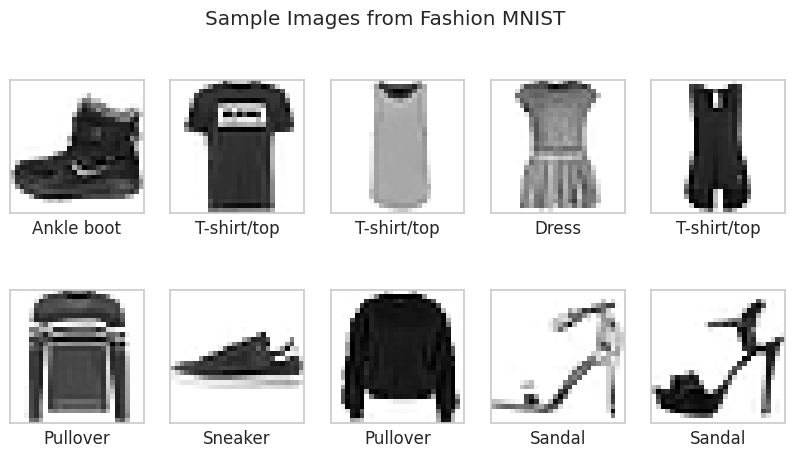

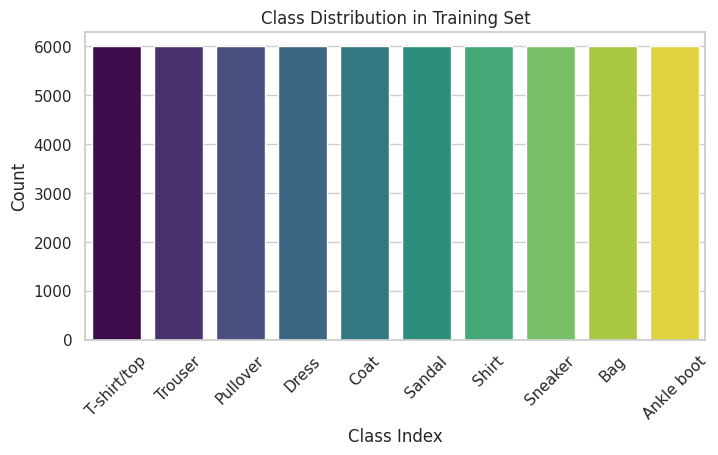

In [7]:
# VISUALIZATION AND EXPLORATION
print("\n Visualizing Data")

# Visualize Sample Images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.suptitle("Sample Images from Fashion MNIST")
plt.show()

# Explore Class Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, hue=y_train, palette="viridis", legend=False)
plt.title("Class Distribution in Training Set")
plt.xlabel("Class Index")
plt.ylabel("Count")
plt.xticks(ticks=range(10), labels=class_names, rotation=45)
plt.show()

In [8]:
# MODEL IMPLEMENTATION
def evaluate_model(model_name, y_true, y_pred, fit_time=None):
    print(f"\nResults for {model_name}:")
    acc = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {acc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return acc

# Dictionary to store results for comparison
results = {}


 Training Logistic Regression


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 382 seconds

Results for Logistic Regression:
Accuracy: 0.8444

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.81      0.80      1000
     Trouser       0.97      0.96      0.97      1000
    Pullover       0.73      0.74      0.73      1000
       Dress       0.83      0.86      0.84      1000
        Coat       0.74      0.76      0.75      1000
      Sandal       0.94      0.92      0.93      1000
       Shirt       0.63      0.57      0.60      1000
     Sneaker       0.91      0.94      0.93      1000
         Bag       0.93      0.93      0.93      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


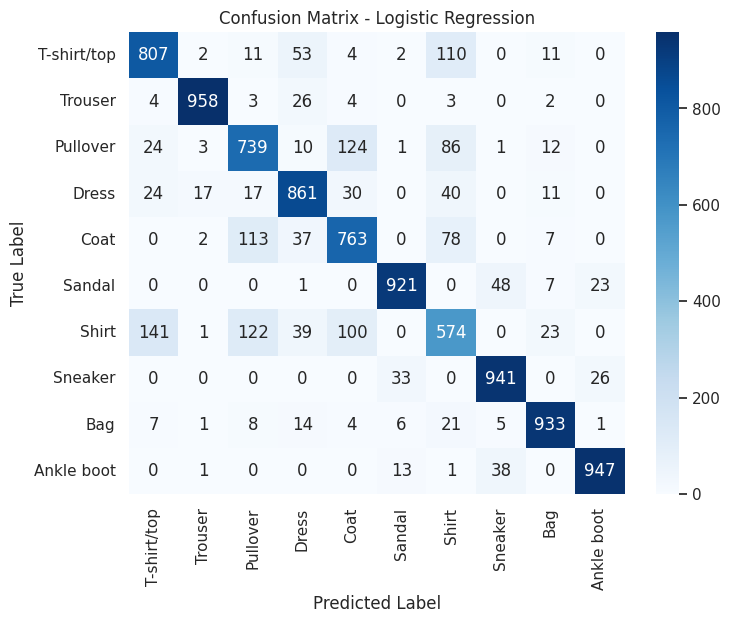

In [9]:
print("\n Training Logistic Regression")
log_reg = LogisticRegression(max_iter=200, solver='sag', multi_class='multinomial', n_jobs=-1, verbose=1)
log_reg.fit(x_train_flat, y_train)

y_pred_log_reg = log_reg.predict(x_test_flat)
results['Logistic Regression'] = evaluate_model("Logistic Regression", y_test, y_pred_log_reg)


 Training ANN
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.7739 - loss: 0.6474 - val_accuracy: 0.8457 - val_loss: 0.4028 - learning_rate: 0.0010
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8473 - loss: 0.4178 - val_accuracy: 0.8707 - val_loss: 0.3500 - learning_rate: 9.0000e-04
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8634 - loss: 0.3739 - val_accuracy: 0.8742 - val_loss: 0.3386 - learning_rate: 8.1000e-04
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8727 - loss: 0.3459 - val_accuracy: 0.8818 - val_loss: 0.3241 - learning_rate: 7.2900e-04
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8825 - loss: 0.3233 - val_accuracy: 0.8848 - val_loss: 0.3171 - learning_rate: 6.5610e-04
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8868 - loss: 0.3076 - val_accuracy: 0.8920 - val_loss: 0.2941 - learning_rate: 5.9049e-04
Epoch 7/10
1688/1688 ━━━━━━━━

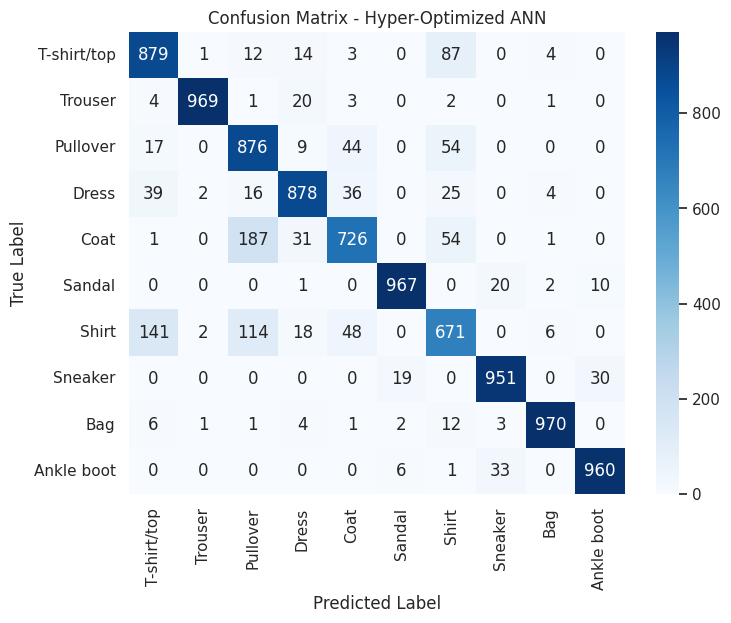

In [45]:
# Artificial Neural Network (ANN) Implementation
print("\n Training ANN")
ann_model = models.Sequential([
    keras.Input(shape=(28, 28)),
    layers.Flatten(),

    # Layer 1: High Capacity
    layers.Dense(512, use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('swish'),
    layers.Dropout(0.25),

    # Layer 2
    layers.Dense(256, use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('swish'),
    layers.Dropout(0.25),

    # Layer 3
    layers.Dense(128, use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('swish'),
    layers.Dropout(0.3),

    layers.Dense(10, activation='softmax')
])

optimizer = keras.optimizers.Nadam(learning_rate=0.001)

lr_scheduler = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 0.9 ** epoch
)

ann_model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history_ann = ann_model.fit(x_train, y_train, epochs=10,
                            validation_split=0.1,
                            callbacks=[lr_scheduler],
                            verbose=1)

results['ANN'] = evaluate_model("ANN", y_test, np.argmax(ann_model.predict(x_test), axis=1))


 Training CNN 
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.7518 - loss: 0.6960 - val_accuracy: 0.8649 - val_loss: 0.3646
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.8770 - loss: 0.3408 - val_accuracy: 0.8864 - val_loss: 0.3134
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.8946 - loss: 0.2914 - val_accuracy: 0.8993 - val_loss: 0.2768
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9066 - loss: 0.2551 - val_accuracy: 0.8999 - val_loss: 0.2746
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9169 - loss: 0.2255 - val_accuracy: 0.9014 - val_loss: 0.2728
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 30ms/step - accuracy: 0.9223 - loss: 0.2066 - val_accuracy: 0.9067 - val_loss: 0.2606
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9334 - loss: 0.1795 - val_accuracy: 0.9041 - val_loss: 0.2628
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - ac

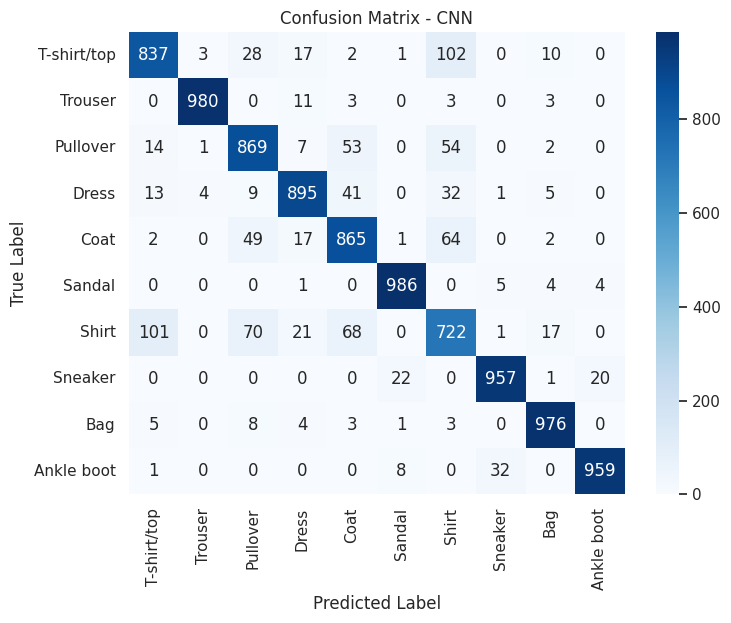

In [34]:
# Convolutional Neural Network (CNN) Implementation
print("\n Training CNN ")
# CNN Architecture Used: Conv2D -> MaxPool -> Conv2D -> MaxPool -> Flatten -> Dense -> Output
# 1. Define Input
inputs = keras.Input(shape=(28, 28, 1))

# 2. Define Layers
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', name='last_conv')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

# 3. Create Model
cnn_model = keras.Model(inputs=inputs, outputs=outputs)

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(x_train_cnn, y_train, epochs=10, validation_split=0.2, verbose=1)

# Evaluate
y_pred_cnn = np.argmax(cnn_model.predict(x_test_cnn), axis=1)
results['CNN'] = evaluate_model("CNN", y_test, y_pred_cnn)

/tmp/ipython-input-940550699.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="magma")


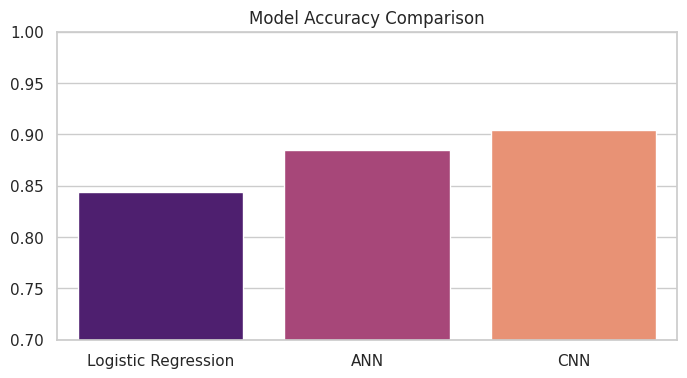

In [46]:
plt.figure(figsize=(8, 4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="magma")
plt.title("Model Accuracy Comparison")
plt.ylim(0.7, 1.0)
plt.show()

In [33]:
_ = cnn_model.predict(x_test_cnn[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_29']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


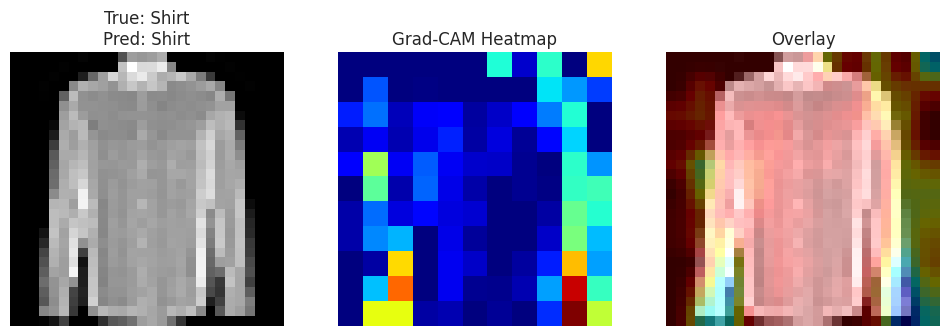

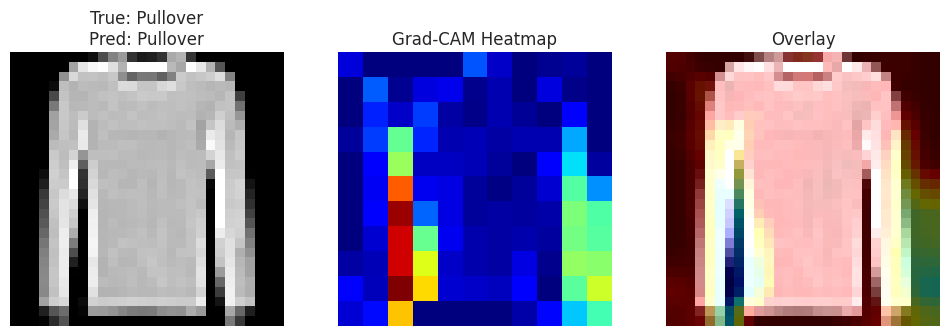

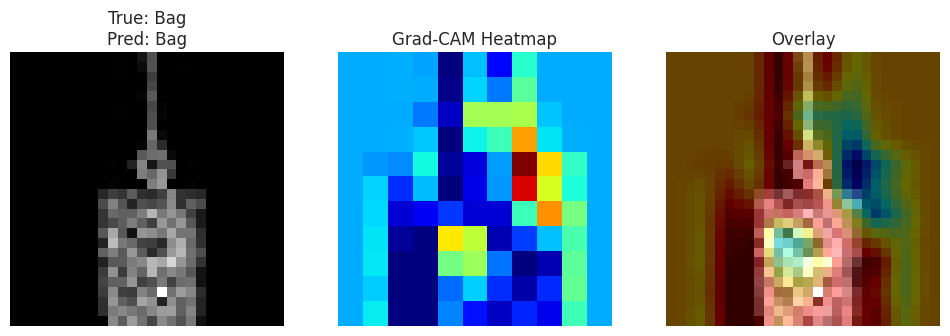

In [35]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute the gradient of the top predicted class for our input image
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron with regard to the output feature map
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Global Average Pooling
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiplication
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Apply ReLU
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# --- Visualization Loop ---
indices = np.random.choice(range(len(x_test)), 3, replace=False)

for idx in indices:
    img = x_test_cnn[idx]
    img_array = np.expand_dims(img, axis=0)

    # Get labels
    preds = cnn_model.predict(img_array, verbose=0)
    pred_label = class_names[np.argmax(preds)]
    true_label = class_names[y_test[idx]]

    # Generate Heatmap
    heatmap = make_gradcam_heatmap(img_array, cnn_model, 'last_conv')

    # Plotting
    plt.figure(figsize=(12, 4))

    # 1. Original
    plt.subplot(1, 3, 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

    # 2. Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap, cmap='jet')
    plt.title("Grad-CAM Heatmap")
    plt.axis('off')

    # 3. Overlay
    heatmap_resized = cv2.resize(heatmap, (28, 28))
    heatmap_resized = np.uint8(255 * heatmap_resized)
    heatmap_resized = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)

    img_rgb = np.uint8(255 * img)
    img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_GRAY2RGB)

    superimposed_img = heatmap_resized * 0.4 + img_rgb
    superimposed_img = np.clip(superimposed_img, 0, 255).astype('uint8')

    plt.subplot(1, 3, 3)
    plt.imshow(superimposed_img)
    plt.title("Overlay")
    plt.axis('off')
    plt.show()